# Dimensionality Reduction Methods: D212
## By Natalie Toler

### Table of Contents
#### Part 1: Research Question
#### Part 2: Method Justification
#### Part 3: Data Preparation
#### Part 4: Analysis
#### Part 5: Attachments

#### Sources

## Part 1: Research Question

A1. Research Question

   Using the dataset of Age and Total Cost of hospitalization, can we identify the principal components that account for the most variance to reduce the dimensionality of the dataset for better further analysis?

A2. Goal

   The goal of this project is to reduce the dimensionality of the continuous variable dataset (Age and Total Cost of hospitalization) using PCA, so that further analyses can be more effective and efficient.
   
## Part 2: Method Justification

B1. PCA

Principal Component Analysis will analyze the selected dataset through the following steps:

- Standardization of Data: The continuous numeric variables, patient age and hospitalization cost, will be standardized to ensure that they have a mean of zero and a standard deviation of one. 

- Covariance Matrix Calculation: A covariance matrix will be calculated to understand how the variables in the dataset are correlated with each other. This matrix will help in identifying relationships between variables.

- Eigenvalue and Eigenvector Computation: Eigenvalues and eigenvectors will be computed from the covariance matrix. Eigenvalues will help determine the amount of variance captured by each principal component, while eigenvectors will define the direction of these components in the multidimensional space.

- Principal Component Selection: Principal components will be selected based on their eigenvalues. Components with higher eigenvalues will be chosen as they explain a larger portion of the variance in the dataset. I will use a scree plot will be used to visualize and decide the number of principal components to retain.

- Transformation: The original data will be transformed into a new set of variables, the principal components, which are uncorrelated. These components will be linear combinations of the original variables and will capture the maximum variance in the data.

Expected Outcomes:

- Reduced Dimensionality: The dataset will have fewer dimensions, making it easier to visualize and analyze while preserving most of the original variance.
- Uncorrelated Principal Components: Each principal component will be independent of the others, providing unique information about the data's variance.
- Explained Variance: The explained variance ratio will indicate the proportion of the dataset's variance captured by each principal component, helping to understand how much information is retained.
- Insights into Patient Data: By examining the principal components, we can identify underlying patterns and trends in patient age and hospitalization cost, which can inform strategies for improving patient outcomes.

Overall, PCA will help to simplify the complexity of the dataset, making it easier to identify significant patterns and relationships that impact patient outcomes. [A Step-by-Step Explanation of Principal Component Analysis (PCA)](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

B2. Assumption

   One important assumption made by PCA is that the relationship between the variables is linear. Which is how the PCA identifies principal components.

## Part 3: Data Preparation

In [1]:
# The Packages and Libraries I will use for the project

import pandas as pd # Handles the dataset
import numpy as np # Performs certain maths operations
import matplotlib.pyplot as plt # provides visualizations
%matplotlib inline
import seaborn as sns # Provides more visualizations
from sklearn.preprocessing import StandardScaler # Normalizes the data
from sklearn.decomposition import PCA

#Import the dataset and make sure the bonus column is not created.
df = pd.read_csv('medical_clean.csv', index_col=0)
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
#Adjusting the Zipcode column because zipcodes with a leading 0 have had that 0 deleted
# Convert the Zip column to a string and then pad any values with 4 numbers with a leading 0
df['Zip'] = df['Zip'].astype("str").str.zfill(5)

# Check that all values are 5 long
all_have_five_values = all(len(str(value)) == 5 for value in df['Zip'])
print(all_have_five_values)

True


In [3]:
#Simplifying the Timezone categories
df.TimeZone.replace({
    # Puerto Rica has it's own time zone
    'America/Puerto_Rico' : "US - Puerto Rico",
    # All the cities in the US Eastern zone
    'America/New_York' : 'US - Eastern',
    'America/Detroit' : 'US - Eastern',
    'America/Indiana/Indianapolis' : 'US - Eastern',
    'America/Indiana/Vevay' : 'US - Eastern',
    'America/Indiana/Vincennes' : 'US - Eastern',
    'America/Kentucky/Louisville' : 'US - Eastern',
    'America/Toronto' : 'US - Eastern',
    'America/Indiana/Marengo' : 'US - Eastern',
    'America/Indiana/Winamac' : 'US - Eastern',
    # All the cities in US Central zone
    'America/Chicago' : 'US - Central',
    'America/Menominee' : 'US - Central',
    'America/Indiana/Knox' : 'US - Central',
    'America/Indiana/Tell_City' : 'US - Central',
    'America/North_Dakota/Beulah' : 'US - Central',
    'America/North_Dakota/New_Salem' : 'US - Central',
    # All the Cities in US Mountain zone
    'America/Denver' : 'US - Mountain',
    'America/Boise' : 'US - Mountain',
    # Arizona which is Mountain but doesn't observe day light savings
    'America/Phoenix' : 'US - Arizona',
    # The city in Pacific time
    'America/Los_Angeles' : 'US - Pacific',
    # Alaskan Time zone
    'America/Nome' : 'US - Alaskan',
    'America/Anchorage' : 'US - Alaskan',
    'America/Sitka' : 'US - Alaskan',
    'America/Yakutat' : 'US - Alaskan',
    # Hawaiian Time Zone that doesn't observe day light savings
    'Pacific/Honolulu' : 'US - Hawaiian',
    # Aleutian time zone that observes day light savings and otherwise would be with Hawaiian
    'America/Adak' : 'US - Aleutian'
    }, inplace = True)

df['TimeZone'].value_counts()

US - Eastern        4326
US - Central        3792
US - Pacific         937
US - Mountain        698
US - Arizona         100
US - Alaskan          69
US - Puerto Rico      43
US - Hawaiian         34
US - Aleutian          1
Name: TimeZone, dtype: int64

In [4]:
#Changing Datatypes
#Convert area to category from string
df["Area"] = df["Area"].astype("category")
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to category from string
df["Services"] = df["Services"].astype("category")

In [5]:
#Boolean columns remapped to 1/0 binary
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)

In [6]:
# Convert Complication risk to 1, 2, 3 for low, medium, high
risk_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
# Map the values in the "complication_risk" column using the defined mapping
df['Complication_risk'] = df['Complication_risk'].map(risk_mapping)
# Convert to int type
df['Complication_risk'] = df['Complication_risk'].astype(int)

In [7]:
# Define the ordered categorical datatype structure
survey_response = pd.CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
# Apply the ordered categorical datatype to the columns
columns_to_encode = ["Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"]
for column in columns_to_encode:
    df[column] = df[column].astype(str)
    df[column] = df[column].astype(survey_response)

In [8]:
#Column renaming
# Generate and apply Pythonic names
pythonic_columns = ['customer_id', 'interactions', 'uid', 'city', 'state', 'county', 'zip', 'lat', 'lng', 'population',
                    'area', 'timezone', 'job', 'children', 'age', 'income', 'marital', 'gender','readmission', 'vit_d',
                    'doc_visits', 'full_meals', 'vit_d_supplement', 'soft_drink', 'initial_admin', 'high_blood',
                    'stroke', 'complication_risk', 'overweight', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain',
                    'anxiety', 'allergic_rhinitis','reflux_esophagitis', 'asthma', 'services', 'initial_days',
                    'total_charge', 'additional_charges', 'survey_timely_admission', 'survey_timely_treatment',
                    'survey_timely_visits', 'survey_reliability', 'survey_options', 'survey_hours_treatment',
                    'survey_courteous_staff', 'survey_active_listening']
df.set_axis(pythonic_columns, axis=1, inplace=True)

/var/folders/vk/xjtd_82n6p19qm_b7nz56_cw0000gn/T/ipykernel_24894/2711196450.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(pythonic_columns, axis=1, inplace=True)


In [9]:
# Check the data now that the cleaning is done
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customer_id              10000 non-null  object  
 1   interactions             10000 non-null  object  
 2   uid                      10000 non-null  object  
 3   city                     10000 non-null  object  
 4   state                    10000 non-null  object  
 5   county                   10000 non-null  object  
 6   zip                      10000 non-null  object  
 7   lat                      10000 non-null  float64 
 8   lng                      10000 non-null  float64 
 9   population               10000 non-null  int64   
 10  area                     10000 non-null  category
 11  timezone                 10000 non-null  category
 12  job                      10000 non-null  object  
 13  children                 10000 non-null  int64   
 14  age   

#### C1. Continuous Data

In [10]:
# Find all of the numeric columns

numeric_data = df.select_dtypes('number')
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lat                 10000 non-null  float64
 1   lng                 10000 non-null  float64
 2   population          10000 non-null  int64  
 3   children            10000 non-null  int64  
 4   age                 10000 non-null  int64  
 5   income              10000 non-null  float64
 6   readmission         10000 non-null  int64  
 7   vit_d               10000 non-null  float64
 8   doc_visits          10000 non-null  int64  
 9   full_meals          10000 non-null  int64  
 10  vit_d_supplement    10000 non-null  int64  
 11  soft_drink          10000 non-null  int64  
 12  high_blood          10000 non-null  int64  
 13  stroke              10000 non-null  int64  
 14  complication_risk   10000 non-null  int64  
 15  overweight          10000 non-null  int64  
 16  arth

In [11]:
# Create dataframe with the coninuous variables

con_df = numeric_data[['lat', 'lng', 'population', 'children', 'age', 'income', 'vit_d', 'doc_visits', 'full_meals',
                 'vit_d_supplement', 'initial_days', 'total_charge', 'additional_charges']].copy()
con_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lat                 10000 non-null  float64
 1   lng                 10000 non-null  float64
 2   population          10000 non-null  int64  
 3   children            10000 non-null  int64  
 4   age                 10000 non-null  int64  
 5   income              10000 non-null  float64
 6   vit_d               10000 non-null  float64
 7   doc_visits          10000 non-null  int64  
 8   full_meals          10000 non-null  int64  
 9   vit_d_supplement    10000 non-null  int64  
 10  initial_days        10000 non-null  float64
 11  total_charge        10000 non-null  float64
 12  additional_charges  10000 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1.1 MB


#### C2. Standardization

In [12]:
scaled = StandardScaler()

In [13]:
scaled_df = scaled.fit_transform(con_df)
scaled_df = pd.DataFrame(scaled_df, columns = con_df.columns)
scaled_df.head()

,lat,lng,population,children,age,income,vit_d,doc_visits,full_meals,vit_d_supplement,initial_days,total_charge,additional_charges
0,-0.814668,0.297134,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005
1,-1.463305,0.395522,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114
2,0.886966,-0.354788,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635
3,0.952530,-0.149403,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004
4,-0.213252,0.943984,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991


In [14]:
# Save Scaled Data to a CSV
scaled_df.to_csv('scaled_df.csv')

## Part 4: Analysis

#### D1. Matrix

In [15]:
pca = PCA()
pc = pca.fit_transform(scaled_df)
loading_matrix = pd.DataFrame(pca.components_, columns=con_df.columns, 
                              index=[f'PC{i+1}' for i in range(pca.n_components_)])
loading_matrix

,lat,lng,population,children,age,income,vit_d,doc_visits,full_meals,vit_d_supplement,initial_days,total_charge,additional_charges
PC1,-0.018834,-0.011011,0.028719,0.034537,0.084650,-0.019701,-0.001995,-0.006991,-0.020712,0.025381,0.699994,0.701146,0.085029
PC2,0.000913,0.009716,-0.029027,0.017244,0.700793,-0.019176,0.020340,0.015446,0.031960,0.014511,-0.089859,-0.079267,0.700745
PC3,-0.715570,0.274895,0.626046,-0.034510,0.011244,0.075776,-0.020176,0.017291,-0.103248,0.029741,-0.022902,-0.020888,0.013730
PC4,-0.036559,-0.474659,0.295638,0.344621,-0.020860,-0.067301,0.526197,0.096735,0.454738,-0.262904,-0.007101,-0.003830,-0.004630
PC5,0.128188,-0.554592,0.250669,0.158969,0.010691,0.412381,-0.213021,0.282211,-0.385982,0.377611,-0.018751,-0.019601,0.019713
PC6,-0.018260,-0.289613,0.142253,0.231131,0.011755,-0.149024,-0.366372,-0.820104,-0.050904,-0.097049,-0.017957,-0.019199,0.016979
PC7,-0.039974,0.229759,-0.174676,0.427505,0.006632,0.651545,-0.208667,0.040698,0.062235,-0.508283,0.013322,0.012132,0.006236
PC8,-0.005117,0.320779,-0.135732,0.717166,-0.017856,-0.162893,0.305325,-0.076493,-0.238447,0.424062,-0.023812,-0.022769,-0.025023
PC9,-0.067661,0.056053,-0.083567,-0.131085,-0.013308,0.461862,0.061710,-0.285582,0.590939,0.565530,0.008988,0.009702,-0.006886
PC10,-0.039423,0.033702,0.038751,0.292473,-0.020631,-0.359436,-0.634109,0.381544,0.462602,0.137073,-0.007002,-0.005149,-0.010633


In [16]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.15349968, 0.13194741, 0.09438151, 0.08001254, 0.07978794,
       0.07737552, 0.0772561 , 0.07613626, 0.07506779, 0.07441192,
       0.05742498, 0.02179743, 0.00090091])

#### D2. Total Number of Principal Components

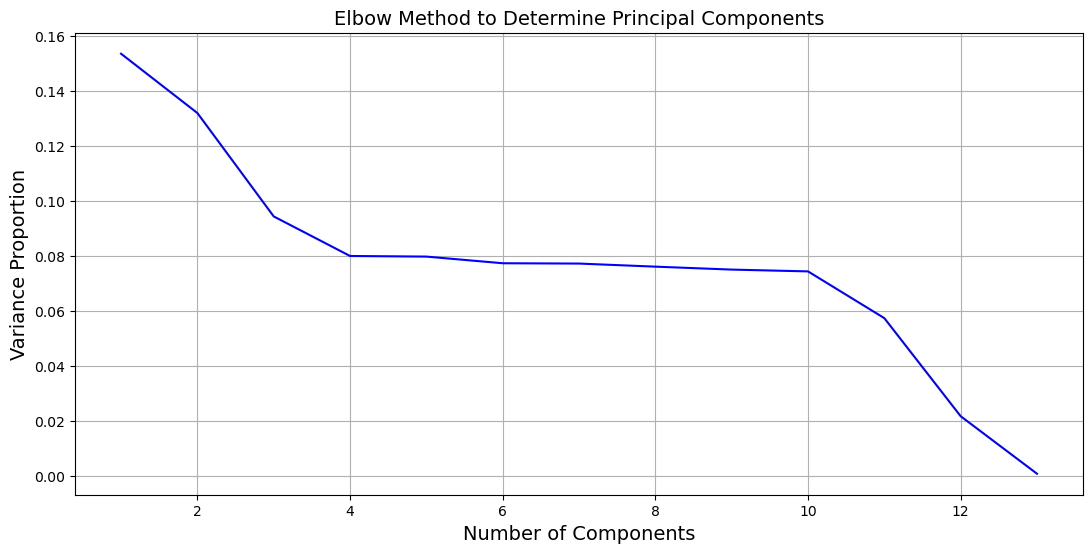

In [17]:
# Using Elbow Method to Determine the Principal Components

principal_component = np.arange(pca.n_components_) + 1
plt.figure(figsize=(13, 6))
plt.plot(principal_component, variance_ratio, 'b-')
plt.title('Elbow Method to Determine Principal Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Variance Proportion', fontsize=14)
plt.grid()
plt.show()

From the elbow method I would conclude that there are four principal components.

In [18]:
print(dict(zip(['PC1', 'PC2', 'PC3', 'PC4'], principal_component)))

{'PC1': 1, 'PC2': 2, 'PC3': 3, 'PC4': 4}


In [19]:
print('Variance of the first 4 principal components')
print(pca.explained_variance_[:4])

Variance of the first 4 principal components
[1.99569541 1.71548793 1.22708234 1.0402671 ]


In [20]:
total_variance_elbow = np.sum(variance_ratio[:4])
print("Total variance captured by the first 4 principal components:", total_variance_elbow)

Total variance captured by the first 4 principal components: 0.4598411483762099


In [21]:
variance = pca.explained_variance_
variance

array([1.99569541, 1.71548793, 1.22708234, 1.0402671 , 1.03734702,
       1.00598239, 1.0044298 , 0.9898703 , 0.97597888, 0.96745167,
       0.74659936, 0.28339498, 0.01171295])

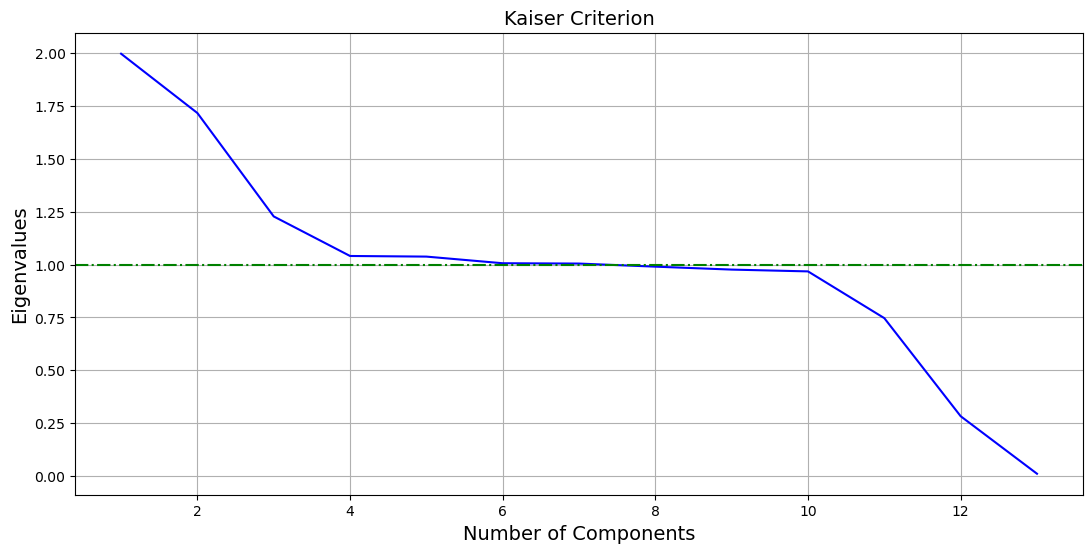

In [22]:
# Using the Kaiser Criterion to determine the Principal Components

plt.figure(figsize=(13, 6))
plt.plot(principal_component, variance, 'b')
plt.title('Kaiser Criterion', fontsize=14)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Eigenvalues', fontsize=14)
plt.axhline(y=1, color='g', linestyle='dashdot')
plt.grid()
plt.show()

From the Kaiser Criterion I would determine that there are 6 principal components.

In [23]:
print(dict(zip(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], principal_component)))

{'PC1': 1, 'PC2': 2, 'PC3': 3, 'PC4': 4, 'PC5': 5, 'PC6': 6}


In [24]:
print('Variance of the first 6 principal components:')
print(pca.explained_variance_[:6])

Variance of the first 6 principal components:
[1.99569541 1.71548793 1.22708234 1.0402671  1.03734702 1.00598239]


In [25]:
total_variance_elbow = np.sum(variance_ratio[:6])
print("Total variance captured by the first 6 principal components:", total_variance_elbow)

Total variance captured by the first 6 principal components: 0.6170046160828812


### D3. Variance of Principal Components

Using the Elbow Method, I concluded that the first four principal components should be retained. The variance ratios, eigenvalues, and explained variance percentages for these components are as follows:

- PC1: Variance Ratio: 0.1535, Eigenvalue: 1.9957, Explained Variance: 15.35%
- PC2: Variance Ratio: 0.1319, Eigenvalue: 1.7155, Explained Variance: 13.19%
- PC3: Variance Ratio: 0.0944, Eigenvalue: 1.2271, Explained Variance: 9.44%
- PC4: Variance Ratio: 0.0800, Eigenvalue: 1.0403, Explained Variance: 8.00%

By summing the variance ratios of the first four principal components, I determined that they explain 46% of the total variance in the data. This significant reduction from 13 to 4 dimensions retains nearly half of the dataset’s variance.

Using the Kaiser Criterion, which suggests retaining components with eigenvalues greater than 1, I identified six principal components to keep. The variance ratios, eigenvalues, and explained variance percentages for these components are:

- PC1: Variance Ratio: 0.1535, Eigenvalue: 1.9957, Explained Variance: 15.35%
- PC2: Variance Ratio: 0.1319, Eigenvalue: 1.7155, Explained Variance: 13.19%
- PC3: Variance Ratio: 0.0944, Eigenvalue: 1.2271, Explained Variance: 9.44%
- PC4: Variance Ratio: 0.0800, Eigenvalue: 1.0403, Explained Variance: 8.00%
- PC5: Variance Ratio: 0.0798, Eigenvalue: 1.0373, Explained Variance: 7.98%
- PC6: Variance Ratio: 0.0774, Eigenvalue: 1.0060, Explained Variance: 7.74%

Summing these variance ratios shows that the first six principal components explain 62% of the total variance. This greater portion of the dataset’s variance provides a more comprehensive reduction in dimensionality from 13 to 6, making the Kaiser Criterion's recommendation more suitable for further analysis.

In [26]:
# Provided eigenvalues and explained variance ratios for the first 6 principal components
eigenvalues = pca.explained_variance_[:6]
variance_ratios = pca.explained_variance_ratio_[:6]

# Calculate the explained variance percentages for the first six components
explained_variances = [vr * 100 for vr in variance_ratios]

print(f"{'Component':<10}{'Variance Ratio':>20}{'Eigenvalue':>20}{'Explained Variance (%)':>30}")
print("-" * 80)
for i, (vr, ev, evp) in enumerate(zip(variance_ratios, eigenvalues, explained_variances), 1):
    print(f"PC{i:<8}{vr:>20.4f}{ev:>20.4f}{evp:>30.2f}")

Component       Variance Ratio          Eigenvalue        Explained Variance (%)
--------------------------------------------------------------------------------
PC1                     0.1535              1.9957                         15.35
PC2                     0.1319              1.7155                         13.19
PC3                     0.0944              1.2271                          9.44
PC4                     0.0800              1.0403                          8.00
PC5                     0.0798              1.0373                          7.98
PC6                     0.0774              1.0060                          7.74


D4. Total Variance of Principal Components

As seen above the total variance ratio of the first six principal components is 0.62, which represents 62% of the total variance of the dataset can be explained by the first six principal components. 

D5. Summary of Results

From this PCA analysis I have concluded that by using the Kaiser criterion of keeping only PCs that have eigenvalues above 1 that there are six principal compondents to keep for further analysis of the dataset. These 6 components explain 62% of the variance in the dataset while cutting down the dimensionality to 6 which will lead to better models and avoid overfitting. While it is not within the scope of this project I have included below the loading matrix for the six principal components and the key variables for each. This would be the next step for further analysis to determine which variables will most impact patient outcomes and the patient population.

In [27]:
# Get the loading matrix
loading_matrix = pd.DataFrame(pca.components_, columns=con_df.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])

# Display the loading matrix for the first six principal components
print(loading_matrix.head(6))

# Interpret key variables for each PC
for i in range(6):
    pc_loadings = loading_matrix.iloc[i]
    sorted_loadings = pc_loadings.abs().sort_values(ascending=False)
    key_variables = sorted_loadings.index[:3]  # Top 3 variables
    print(f'PC{i+1} key variables: {key_variables.tolist()}')

          lat       lng  population  children       age    income     vit_d  \
PC1 -0.018834 -0.011011    0.028719  0.034537  0.084650 -0.019701 -0.001995   
PC2  0.000913  0.009716   -0.029027  0.017244  0.700793 -0.019176  0.020340   
PC3 -0.715570  0.274895    0.626046 -0.034510  0.011244  0.075776 -0.020176   
PC4 -0.036559 -0.474659    0.295638  0.344621 -0.020860 -0.067301  0.526197   
PC5  0.128188 -0.554592    0.250669  0.158969  0.010691  0.412381 -0.213021   
PC6 -0.018260 -0.289613    0.142253  0.231131  0.011755 -0.149024 -0.366372   

     doc_visits  full_meals  vit_d_supplement  initial_days  total_charge  \
PC1   -0.006991   -0.020712          0.025381      0.699994      0.701146   
PC2    0.015446    0.031960          0.014511     -0.089859     -0.079267   
PC3    0.017291   -0.103248          0.029741     -0.022902     -0.020888   
PC4    0.096735    0.454738         -0.262904     -0.007101     -0.003830   
PC5    0.282211   -0.385982          0.377611     -0.018751  

### Sources

For the cleaning of the dataset I have used my previous PA's throughout this program. 

The code for much of the PCA was developed using the DataCamp courses provided and the Panopto videos from the course instructor. 

Further interpretation and explaination of the PCA method were found in the course resources. 

> DataCamp. (n.d.). Custom Data Mining II. Retrieved June 30, 2024, from https://app.datacamp.com/learn/custom-tracks/custom-data-mining-ii

> Panopto. (n.d.). PCA Python Tools (Dr. Kesselly Kamara). Retrieved June 30, 2024, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=4406550f-d37b-40b1-9783-b14001098759

> Panopto. (n.d.). PCA Data Preprocessing (Dr. Kesselly Kamara). Retrieved June 30, 2024, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b094cb1f-ba6f-40c1-a033-b140010a4314

> Panopto. (n.d.). Create PCA Object and Analyze Data (Dr. Kesselly Kamara). Retrieved June 30, 2024, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d656d2c9-9409-41e0-a01c-b14001099afa

> Panopto. (n.d.). Interpret PCA Results (Dr. Kesselly Kamara). Retrieved June 30, 2024, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=bc874da5-bef1-4468-b829-b1400109a36d

> Panopto. (n.d.). Summary of PCA (Dr. Kesselly Kamara). Retrieved June 30, 2024, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=76db963a-9c7b-476f-af92-b150000eb58d

> DataCamp. (01/2020). Principal Component Analysis (PCA) in Python Tutorial (Aditya Sharma). Retrieved June 30, 2024, from https://www.datacamp.com/tutorial/principal-component-analysis-in-python

> Jaadi, Z. (2024, February 23). A step-by-step explanation of principal component analysis (PCA). Built In. Retrieved from https://builtin.com/data-science/step-step-explanation-principal-component-analysis